# Example of DOV search methods for groundwater screens (grondwaterfilters)


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_grondwaterfilters.ipynb)

## Use cases:
* Get groundwater screens in a bounding box
* Get groundwater screens with specific properties
* Get the coordinates of all groundwater screens in Ghent
* Get the 'meetnet' and 'meetnet_code' for groundwater screens in Boortmeerbeek
* Get all details of groundwaterscreens of 'meetnet 9' within the given bounding box
* Get groundwater screens based on a combination of specific properties
* Get groundwater screens within a groundwater body

In [1]:
%matplotlib inline
import inspect, sys

In [2]:
# check pydov path
import pydov

## Get information about the datatype 'GrondwaterFilter'

In [3]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
gwfilter = GrondwaterFilterSearch()

A description is provided for the 'GrondwaterFilter' datatype:

In [4]:
print(gwfilter.get_description())

In de Databank Ondergrond Vlaanderen zijn verschillende grondwatermeetnetten opgenomen. Deze meetnetten staan in functie van uitgebreide monitoringprogramma’s met de bedoeling een goed beeld te krijgen van de beschikbare grondwaterkwantiteit en grondwaterkwaliteit van de watervoerende lagen in Vlaanderen.


The different fields that are available for objects of the 'GrondwaterFilter' datatype can be requested with the get_fields() method:

In [5]:
fields = gwfilter.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

gw_id
pkey_grondwaterlocatie
filternummer
pkey_filter
namen
filtergrafiek
putgrafiek
aquifer
diepte_onderkant_filter
lengte_filter
putsoort
filtertype
meetnet
x
y
start_grondwaterlocatie_mtaw
gemeente
grondwaterlichaam
regime
datum_in_filter
datum_uit_filter
stijghoogterapport
analyserapport
boornummer
boringfiche
peilmetingen_van
peilmetingen_tot
kwaliteitsmetingen_van
kwaliteitsmetingen_tot
recentste_exploitant
beheerder
mv_mtaw
meetnet_code
aquifer_code
grondwaterlichaam_code
datum
tijdstip
peil_mtaw
betrouwbaarheid
methode
filterstatus
filtertoestand


You can get more information of a field by requesting it from the fields dictionary:
* *name*: name of the field
* *definition*: definition of this field
* *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe.
* *notnull*: whether the field is mandatory or not
* *type*: datatype of the values of this field

In [6]:
# print information for a certain field
fields['aquifer']

{'name': 'aquifer',
 'definition': 'De aquifer waarin de filter hangt. Als tekst, opgebouwd uit de HCOV code (vier karakters) en de naam gescheiden door " - "',
 'type': 'string',
 'notnull': True,
 'query': True,
 'cost': 1}

Optionally, if the values of the field have a specific domain the possible values are listed as *values*:

In [7]:
# if an attribute can have several values, these are listed under 'values', e.g. for 'putsoort':
fields['putsoort']['values']

{'Installatie': None,
 'batterijput': None,
 'bodemlus': None,
 'bron, natuurlijke holte': None,
 'bronbemaling': None,
 'draineringsinrichting': None,
 'galerij': None,
 'graverij, mijn, groeve': None,
 'niet-verbuisde boorput': None,
 'onbekend': None,
 'ring- of steenput': None,
 'verbuisde boorput': None,
 'vijver': None}

## Example use cases

### Get groundwater screens in a bounding box

Get data for all the groundwater screens that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [8]:
from pydov.util.location import Within, Box

df = gwfilter.search(location=Within(Box(93378, 168009, 94246, 169873)))
df.head()

[000/026] ..........................


,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,start_grondwaterlocatie_mtaw,mv_mtaw,gemeente,...,regime,diepte_onderkant_filter,lengte_filter,datum,tijdstip,peil_mtaw,betrouwbaarheid,methode,filterstatus,filtertoestand
0,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,SWPP006,1,peilfilter,94147.0,169582.0,9.4,9.4,Wortegem-Petegem,...,onbekend,NaN,NaN,1999-04-13,NaN,9.22,onbekend,peillint,onbekend,1.0
1,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,SWPP006,1,peilfilter,94147.0,169582.0,9.4,9.4,Wortegem-Petegem,...,onbekend,NaN,NaN,1999-04-14,NaN,9.41,onbekend,peillint,onbekend,1.0
2,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,SWPP006,1,peilfilter,94147.0,169582.0,9.4,9.4,Wortegem-Petegem,...,onbekend,NaN,NaN,1999-04-22,NaN,9.29,onbekend,peillint,onbekend,1.0
3,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,SWPP006,1,peilfilter,94147.0,169582.0,9.4,9.4,Wortegem-Petegem,...,onbekend,NaN,NaN,1999-05-06,NaN,9.11,onbekend,peillint,onbekend,1.0
4,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,SWPP006,1,peilfilter,94147.0,169582.0,9.4,9.4,Wortegem-Petegem,...,onbekend,NaN,NaN,1999-05-18,NaN,9.01,onbekend,peillint,onbekend,1.0


Using the *pkey* attributes one can request the details of the corresponding *put* or *filter* in a webbrowser:

In [9]:
for pkey_grondwaterlocatie in set(df.pkey_grondwaterlocatie):
    print(pkey_grondwaterlocatie)

for pkey_filter in set(df.pkey_filter):
    print(pkey_filter)

https://www.dov.vlaanderen.be/data/put/2018-007300
https://www.dov.vlaanderen.be/data/put/2018-007285
https://www.dov.vlaanderen.be/data/put/2018-007288
https://www.dov.vlaanderen.be/data/put/2018-007312
https://www.dov.vlaanderen.be/data/put/2018-007290
https://www.dov.vlaanderen.be/data/put/2018-007292
https://www.dov.vlaanderen.be/data/put/2018-007294
https://www.dov.vlaanderen.be/data/put/2018-007287
https://www.dov.vlaanderen.be/data/put/2017-002867
https://www.dov.vlaanderen.be/data/put/2018-007286
https://www.dov.vlaanderen.be/data/put/2017-002866
https://www.dov.vlaanderen.be/data/put/2017-002868
https://www.dov.vlaanderen.be/data/put/2018-007291
https://www.dov.vlaanderen.be/data/put/2018-007293
https://www.dov.vlaanderen.be/data/put/2018-007295
https://www.dov.vlaanderen.be/data/put/2019-019725
https://www.dov.vlaanderen.be/data/put/2018-007289
https://www.dov.vlaanderen.be/data/put/2018-007307
https://www.dov.vlaanderen.be/data/put/2018-007313
https://www.dov.vlaanderen.be/d

### Get groundwater screens with specific properties

Next to querying groundwater screens based on their geographic location within a bounding box, we can also search for groundwater screens matching a specific set of properties. For this we can build a query using a combination of the 'GrondwaterFilter' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [10]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsEqualTo* operator to find all groundwater screens that are within the community (gemeente) of 'Hamme':

In [11]:
from owslib.fes import PropertyIsEqualTo

query = PropertyIsEqualTo(
            propertyname='gemeente',
            literal='Herstappe')

df = gwfilter.search(query=query)
df.head()

[000/002] ..


,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,start_grondwaterlocatie_mtaw,mv_mtaw,gemeente,...,regime,diepte_onderkant_filter,lengte_filter,datum,tijdstip,peil_mtaw,betrouwbaarheid,methode,filterstatus,filtertoestand
0,https://www.dov.vlaanderen.be/data/filter/1993...,https://www.dov.vlaanderen.be/data/put/2019-02...,7-001016,1,pompfilter,224798.0,157819.0,130.8,130.8,Herstappe,...,freatisch,45.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.dov.vlaanderen.be/data/filter/1900...,https://www.dov.vlaanderen.be/data/put/2019-05...,7-97027,1,pompfilter,224843.0,157842.0,-1.0,-1.0,Herstappe,...,onbekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Once again we can use the *pkey_filter* as a permanent link to the information of the groundwater screens:

In [12]:
for pkey_filter in set(df.pkey_filter):
    print(pkey_filter)

https://www.dov.vlaanderen.be/data/filter/1993-065801
https://www.dov.vlaanderen.be/data/filter/1900-050992


### Get the coordinates of all groundwater screens in Ghent

In [13]:
query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Gent')

df = gwfilter.search(query=query,
                     return_fields=('pkey_filter', 'x', 'y', 'meetnet'))
df.head()

,pkey_filter,x,y,meetnet
0,https://www.dov.vlaanderen.be/data/filter/1900...,110246.555,205702.179,meetnet 7 - winningsputten
1,https://www.dov.vlaanderen.be/data/filter/1999...,98347.000,191821.000,meetnet 9 - peilputten INBO en natuurorganisaties
2,https://www.dov.vlaanderen.be/data/filter/1999...,98514.000,191518.000,meetnet 9 - peilputten INBO en natuurorganisaties
3,https://www.dov.vlaanderen.be/data/filter/1999...,98630.000,191301.000,meetnet 9 - peilputten INBO en natuurorganisaties
4,https://www.dov.vlaanderen.be/data/filter/1999...,99017.000,191447.000,meetnet 9 - peilputten INBO en natuurorganisaties


### Get the 'meetnet' and 'meetnet_code' for groundwater screens in Boortmeerbeek

In [14]:
query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Boortmeerbeek')

df = gwfilter.search(query=query,
                   return_fields=('pkey_filter', 'meetnet', 'meetnet_code'))
df.head()

[000/050] ..................................................


,pkey_filter,meetnet,meetnet_code
0,https://www.dov.vlaanderen.be/data/filter/1981...,meetnet 7 - winningsputten,7
1,https://www.dov.vlaanderen.be/data/filter/2018...,meetnet 7 - winningsputten,7
2,https://www.dov.vlaanderen.be/data/filter/1976...,meetnet 7 - winningsputten,7
3,https://www.dov.vlaanderen.be/data/filter/1980...,meetnet 7 - winningsputten,7
4,https://www.dov.vlaanderen.be/data/filter/1980...,meetnet 7 - winningsputten,7


### Get all details of groundwaterscreens of 'meetnet 9' within the given bounding box

In [15]:
from owslib.fes import PropertyIsLike

query = PropertyIsLike(propertyname='meetnet',
                       literal='meetnet 9 %')
df = gwfilter.search(query=query,
                     location=Within(Box(87676, 163442, 91194, 168043)))
df.head()

[000/017] .................


,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,start_grondwaterlocatie_mtaw,mv_mtaw,gemeente,...,regime,diepte_onderkant_filter,lengte_filter,datum,tijdstip,peil_mtaw,betrouwbaarheid,methode,filterstatus,filtertoestand
0,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2017-00...,WVSP009,1,peilfilter,89720.046875,165712.140625,11.84,11.84,Avelgem,...,onbekend,5.78,1.0,1999-01-12,NaN,12.20,onbekend,peillint,in rust,1.0
1,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2017-00...,WVSP009,1,peilfilter,89720.046875,165712.140625,11.84,11.84,Avelgem,...,onbekend,5.78,1.0,1999-01-21,NaN,12.26,onbekend,peillint,in rust,1.0
2,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2017-00...,WVSP009,1,peilfilter,89720.046875,165712.140625,11.84,11.84,Avelgem,...,onbekend,5.78,1.0,1999-02-01,NaN,12.31,onbekend,peillint,in rust,1.0
3,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2017-00...,WVSP009,1,peilfilter,89720.046875,165712.140625,11.84,11.84,Avelgem,...,onbekend,5.78,1.0,1999-02-06,NaN,12.29,onbekend,peillint,in rust,1.0
4,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2017-00...,WVSP009,1,peilfilter,89720.046875,165712.140625,11.84,11.84,Avelgem,...,onbekend,5.78,1.0,1999-02-12,NaN,12.18,onbekend,peillint,in rust,1.0


### Get groundwater screens based on a combination of specific properties

Get all groundwater screens in Hamme that have a value for length_filter and either belong to the primary meetnet of VMM or that have a depth bottom screen less than 3 meter.

In [16]:
from owslib.fes import Or, Not, PropertyIsNull, PropertyIsLessThanOrEqualTo, And

query = And([PropertyIsEqualTo(propertyname='gemeente',
                               literal='Hamme'),
             Not([PropertyIsNull(propertyname='lengte_filter')]),
             Or([PropertyIsLike(propertyname='meetnet',
                                literal='meetnet 1%'),
                 PropertyIsLessThanOrEqualTo(
                     propertyname='diepte_onderkant_filter',
                     literal='3')])])
df_hamme = gwfilter.search(query=query,
                     return_fields=('pkey_filter', 'x', 'y', 'gw_id', 'filternummer', 'diepte_onderkant_filter'))
df_hamme.head()

,pkey_filter,x,y,gw_id,filternummer,diepte_onderkant_filter
0,https://www.dov.vlaanderen.be/data/filter/2001...,130078.000000,196561.000000,MORP002,1,1.91
1,https://www.dov.vlaanderen.be/data/filter/2003...,131763.200000,198674.500000,802/21/3,1,2.50
2,https://www.dov.vlaanderen.be/data/filter/2003...,131837.656250,197054.203125,810/21/1,1,2.50
3,https://www.dov.vlaanderen.be/data/filter/2003...,133865.921875,195656.328125,813/21/2,1,2.50
4,https://www.dov.vlaanderen.be/data/filter/2000...,130190.000000,196378.000000,MORP001,1,1.59


## Combine `datum` and `tijdstip` in a datetime object

Get some data and keep only the relevant waterlevel measurements:

In [17]:
query = PropertyIsEqualTo(
            propertyname='pkey_filter',
            literal='https://www.dov.vlaanderen.be/data/filter/1997-000494')

df = gwfilter.search(query=query)
df = df[df.filterstatus == "in rust"]

[000/001] .


If the `tijdstip` field contains data, it can be combined with the `datum` field to create a date.datetime object. Make sure to fill the empty `tijdstip` fields with a default timestamp.

In [18]:
import pandas as pd
df.reset_index(inplace=True)
df['tijdstip'] = df.tijdstip.fillna('00:00:00')
df['tijd'] = pd.to_datetime(df.datum.astype(str)+' '+df.tijdstip.astype(str))
df.tijd.head()

0   1998-07-31 01:05:00
1   1999-01-16 15:01:00
2   1999-08-14 01:05:00
3   1999-11-14 02:40:00
4   1999-12-27 00:01:00
Name: tijd, dtype: datetime64[ns]

## Working with water head time series 

For further analysis and visualisation of the time series data, we can use the data analysis library [pandas](https://pandas.pydata.org/) and visualisation library [matplotlib](https://matplotlib.org/). 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Query the data of a specific filter using its `pkey`:

In [20]:
query = PropertyIsEqualTo(
            propertyname='pkey_filter',
            literal='https://www.dov.vlaanderen.be/data/filter/2003-009883')

df = gwfilter.search(query=query)
df.head()

[000/001] .


,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,start_grondwaterlocatie_mtaw,mv_mtaw,gemeente,...,regime,diepte_onderkant_filter,lengte_filter,datum,tijdstip,peil_mtaw,betrouwbaarheid,methode,filterstatus,filtertoestand
0,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,onbekend,0.68,0.3,2003-10-18,NaN,58.26,onbekend,peillint,onbekend,1
1,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,onbekend,0.68,0.3,2003-11-01,NaN,58.30,onbekend,peillint,onbekend,1
2,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,onbekend,0.68,0.3,2003-11-17,NaN,58.31,onbekend,peillint,onbekend,1
3,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,onbekend,0.68,0.3,2003-11-23,NaN,58.31,onbekend,peillint,onbekend,1
4,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,onbekend,0.68,0.3,2003-12-14,NaN,58.30,onbekend,peillint,onbekend,1


The date is still stored as a string type. Transforming to a data type using the available pandas function [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) and using these dates as row index:

In [21]:
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index('datum')

### Plotting

The default plotting functionality of Pandas can be used:

In [28]:
df.head()

,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,start_grondwaterlocatie_mtaw,mv_mtaw,gemeente,...,grondwaterlichaam_code,regime,diepte_onderkant_filter,lengte_filter,tijdstip,peil_mtaw,betrouwbaarheid,methode,filterstatus,filtertoestand
datum,,,,,,,,,,,,,,,,,,,,,
2003-10-18,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,NaN,onbekend,0.68,0.3,NaN,58.26,onbekend,peillint,onbekend,1
2003-11-01,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,NaN,onbekend,0.68,0.3,NaN,58.30,onbekend,peillint,onbekend,1
2003-11-17,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,NaN,onbekend,0.68,0.3,NaN,58.31,onbekend,peillint,onbekend,1
2003-11-23,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,NaN,onbekend,0.68,0.3,NaN,58.31,onbekend,peillint,onbekend,1
2003-12-14,https://www.dov.vlaanderen.be/data/filter/2003...,https://www.dov.vlaanderen.be/data/put/2018-00...,ZWAP205,1,peilfilter,218953.0,198767.0,58.44,58.44,Houthalen-Helchteren,...,NaN,onbekend,0.68,0.3,NaN,58.30,onbekend,peillint,onbekend,1


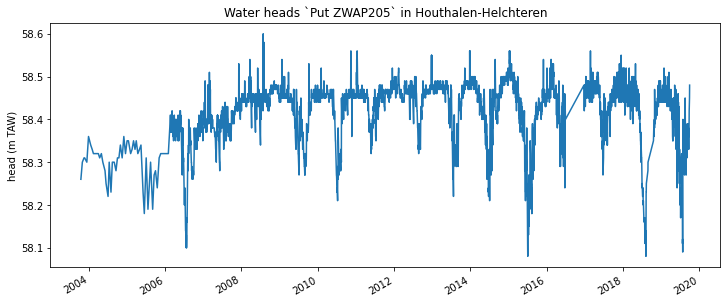

In [37]:
ax = df['peil_mtaw'].plot(style='-', figsize=(12, 5))
ax.set_title('Water heads `Put ZWAP205` in Houthalen-Helchteren');
ax.set_ylabel('head (m TAW)');
ax.set_xlabel('');

Or a combination with matplotlib to have full customization options:

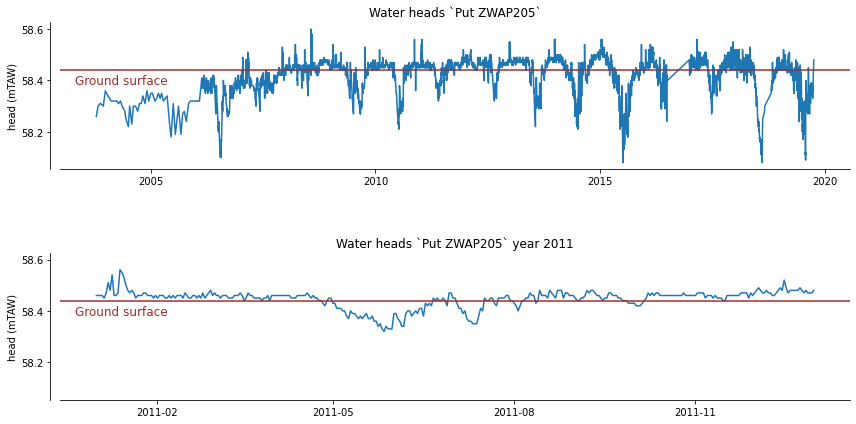

In [25]:
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from matplotlib.ticker import MaxNLocator, MultipleLocator

# Get height of ground surface
ground_surface = df["mv_mtaw"][0]

# create a plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), 
                               sharex=False, sharey=True)

# Plot entire time series in the upper plot
df['peil_mtaw'].plot(ax=ax1, title='Water heads `Put ZWAP205`')
ax1.xaxis.set_major_locator(YearLocator(5))
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

# Plot the data for 2011 in the lower plot
df['peil_mtaw']["2011"].plot(ax=ax2,  title='Water heads `Put ZWAP205` year 2011')
ax2.xaxis.set_major_locator(MonthLocator(interval=3))
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Adjust configuration of plot
for ax in (ax1, ax2):
    ax.set_xlabel('')
    ax.set_ylabel('head (mTAW)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
        tick.set_horizontalalignment('center')

    # Only draw spine between the y-ticks
    ax.spines['left'].set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    
    # Add the ground surface (provided in the data) on the subplots
    ax.axhline(ground_surface, color = 'brown')
    ax.annotate('Ground surface', 
             xy=(0.05, 0.68),
             xycoords='axes fraction',
             xytext=(-25, -15), textcoords='offset points', 
             fontsize=12, color='brown')   
    
fig.tight_layout(h_pad=5)

### Analysis

The Pandas package provides a the functionality to further analyze and process [time series](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) data. Particularly, the [`resample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) function can be useful.

For example, calculate the yearly minima and maxima of the time series:

In [38]:
df["peil_mtaw"].resample("A").agg(['min', 'max'])

,min,max
datum,,
2003-12-31,58.26,58.36
2004-12-31,58.22,58.36
2005-12-31,58.18,58.35
2006-12-31,58.10,58.42
2007-12-31,58.28,58.53
2008-12-31,58.34,58.60
2009-12-31,58.27,58.54
2010-12-31,58.21,58.56
2011-12-31,58.32,58.56


or the monthly minima and maxima:

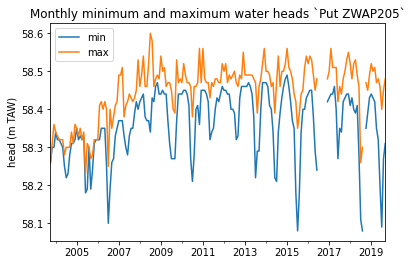

In [40]:
ax = df["peil_mtaw"].resample("M").agg(['min', 'max']).plot()
ax.set_title('Monthly minimum and maximum water heads `Put ZWAP205`');
ax.set_ylabel('head (m TAW)');
ax.set_xlabel('');

Calculate 10 and 90 percentiles of the time series with the `quantile` function:

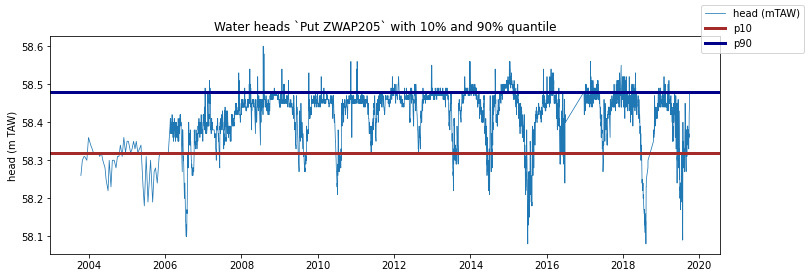

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))    
ax.plot(df["peil_mtaw"], label='head (mTAW)', linewidth=0.75)

ax.axhline(df["peil_mtaw"].quantile(0.1), color = 'brown', label='p10', linewidth=3)
ax.axhline(df["peil_mtaw"].quantile(0.9), color = 'darkblue', label='p90', linewidth=3)
handles, labels = ax.get_legend_handles_labels()

ax.set_title('Water heads `Put ZWAP205` with 10% and 90% quantile');
ax.set_ylabel('head (m TAW)');
ax.set_xlabel('');

fig.legend(handles, labels)

A duration exceedance curve provides the percentage of time that the water head is above a given value:

In [47]:
import numpy as np

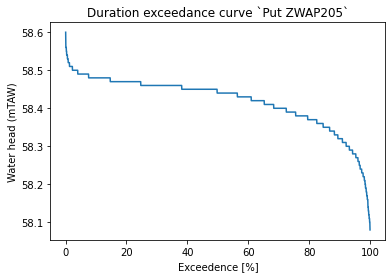

In [50]:
sorted_heads = np.sort(df["peil_mtaw"])[::-1]
exceedence = np.arange(1.,len(sorted_heads)+1) / len(sorted_heads)

fig, ax = plt.subplots()
ax.plot(exceedence*100, sorted_heads)
ax.set_xlabel("Exceedence [%]");
ax.set_ylabel("Water head (mTAW)");
ax.set_title("Duration exceedance curve `Put ZWAP205`");

## Visualize locations

Using Folium, we can display the results of our search on a map.

In [51]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [52]:
# convert the coordinates to lat/lon for folium
def convert_latlon(x1, y1):
    transformer = Transformer.from_crs("epsg:31370", "epsg:4326", always_xy=True)
    x2,y2 = transformer.transform(x1, y1)
    return x2, y2

df_hamme['lon'], df_hamme['lat'] = zip(*map(convert_latlon, df_hamme['x'], df_hamme['y'])) 
# convert to list
loclist = df_hamme[['lat', 'lon']].values.tolist()

In [53]:
# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(location=[df_hamme['lat'].mean(), df_hamme['lon'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(fmap)
for loc in range(0, len(loclist)):
    folium.Marker(loclist[loc], popup=df_hamme['gw_id'][loc]).add_to(marker_cluster)
fmap


### Get groundwater screens within a "grondwaterlichaam"

In [54]:
gwfilter = GrondwaterFilterSearch()

In [55]:
query = PropertyIsLike(
            propertyname='grondwaterlichaam',
            literal='BLKS_1000%')
df = gwfilter.search(max_features=10, 
                     query=query, 
                     return_fields=("pkey_filter", "gw_id", "filternummer", "x", "y", "grondwaterlichaam_code"))
df

[000/010] ..........


,pkey_filter,gw_id,filternummer,x,y,grondwaterlichaam_code
0,https://www.dov.vlaanderen.be/data/filter/1900...,2-100056,1,199553.0,174938.0,BLKS_1000_GWL_2S
1,https://www.dov.vlaanderen.be/data/filter/2014...,7-100188,1,207804.0,168688.0,BLKS_1000_GWL_1S
2,https://www.dov.vlaanderen.be/data/filter/1900...,2-100291,2,215390.0,183107.0,BLKS_1000_GWL_1S
3,https://www.dov.vlaanderen.be/data/filter/2015...,7-100480,1,220356.0,167455.0,BLKS_1000_GWL_2S
4,https://www.dov.vlaanderen.be/data/filter/2015...,2-100723,1,191914.0,165452.0,BLKS_1000_GWL_1S
5,https://www.dov.vlaanderen.be/data/filter/2015...,7-101124,2,229414.0,174604.0,BLKS_1000_GWL_2S
6,https://www.dov.vlaanderen.be/data/filter/1900...,7-101127,1,204320.0,162825.0,BLKS_1000_GWL_1S
7,https://www.dov.vlaanderen.be/data/filter/2015...,7-101138,2,226690.0,176348.0,BLKS_1000_GWL_2S
8,https://www.dov.vlaanderen.be/data/filter/1900...,7-101323,1,207188.0,166062.0,BLKS_1000_GWL_1S
9,https://www.dov.vlaanderen.be/data/filter/1900...,2-101474,1,199679.0,168452.0,BLKS_1000_GWL_1S
